In [ ]:
# 1. Data preparation

In [ ]:
## 1.1. Librerías y shapefile

In [2]:
%pip install rasterio

  Using cached rasterio-1.4.3-cp311-cp311-win_amd64.whl.metadata (9.4 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl.metadata (6.5 kB)
Using cached rasterio-1.4.3-cp311-cp311-win_amd64.whl (25.5 MB)
Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached affine-2.4.0-py3-none-any.whl (15 kB)
Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl (11 kB)

   ------------------------------ --------- 3/4 [rasterio]
   ------------------------------ --------- 3/4 [rasterio]
   ------------------------------ --------- 3/4 [rasterio]
   ------------------------------ --------- 3/4 [rasterio]
   ------------------------------ --------- 3/4 [rasterio]
   ------------------------------ --------- 3/4 [rasterio]
   ------------------------------ --------- 3/4 [rasterio]
   ------------------------------ --------- 3/4 [rasterio]
   -------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
%pip install rasterstats


  Using cached rasterstats-0.20.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached fiona-1.10.1-cp311-cp311-win_amd64.whl.metadata (58 kB)
  Using cached simplejson-3.20.2-cp311-cp311-win_amd64.whl.metadata (3.4 kB)
  Using cached shapely-2.1.2-cp311-cp311-win_amd64.whl.metadata (7.1 kB)
Using cached rasterstats-0.20.0-py3-none-any.whl (17 kB)
Using cached fiona-1.10.1-cp311-cp311-win_amd64.whl (24.5 MB)
Using cached shapely-2.1.2-cp311-cp311-win_amd64.whl (1.7 MB)
Using cached simplejson-3.20.2-cp311-cp311-win_amd64.whl (75 kB)

   ---------------------------------------- 0/4 [simplejson]
   ---------- ----------------------------- 1/4 [shapely]
   ---------- ----------------------------- 1/4 [shapely]
   ---------- ----------------------------- 1/4 [shapely]
   ---------- ----------------------------- 1/4 [shapely]
   ---------- ----------------------------- 1/4 [shapely]
   -------------------- ------------------- 2/4 [fiona]
   -------------------- ------------------- 2/4 [fiona]


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [32]:
import os
print("CWD:", os.getcwd())


CWD: C:\Users\Usuario


In [33]:
shapefile_path = os.path.join("shapefile", "DISTRITOS.shp")
gdf = gpd.read_file(shapefile_path)

gdf.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


In [34]:
# NOMBRES EN MAYÚSCULAS Y SIN DIACRÍTICOS

import unicodedata
import pandas as pd

def mayus_ascii_sin_diacriticos(x):
    """Convierte a MAYÚSCULAS, quita diacríticos y fuerza ASCII (ñ→N, ü→U, etc.)."""
    if pd.isna(x):
        return x
    s = str(x)
    # 1) Descomponer en base + diacríticos
    s = unicodedata.normalize("NFD", s)
    # 2) Eliminar marcas combinantes (tildes, diéresis, virgulillas)
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    # 3) Re-componer y pasar a MAYÚSCULAS
    s = unicodedata.normalize("NFC", s).upper().strip()
    # 4) Forzar ASCII puro (elimina cualquier carácter no ASCII remanente)
    s = s.encode("ascii", "ignore").decode("ascii")
    return s

cols = ["DEPARTAMEN", "PROVINCIA", "DISTRITO", "NOMBRE"]
for c in cols:
    if c in gdf.columns:
        gdf[c] = gdf[c].map(mayus_ascii_sin_diacriticos)

gdf.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


In [ ]:
## 1.2. Raster

In [35]:
# Importar el raster

import rasterio

# Ruta al archivo
archivo = "tmin_raster.tif"

# Abrir el archivo
with rasterio.open(archivo) as src:
    print("Ancho:", src.width)
    print("Alto:", src.height)
    print("Número de bandas:", src.count)
    print("Sistema de coordenadas:", src.crs)
    print("Transformación (afín):", src.transform)

    # Leer los datos de la primera banda
    banda1 = src.read(1)
    banda2 = src.read(2)
    banda3 = src.read(3)
    banda4 = src.read(4)
    banda5 = src.read(5)

Ancho: 285
Alto: 397
Número de bandas: 5
Sistema de coordenadas: EPSG:4326
Transformación (afín): | 0.05, 0.00,-81.38|
| 0.00,-0.05, 1.20|
| 0.00, 0.00, 1.00|


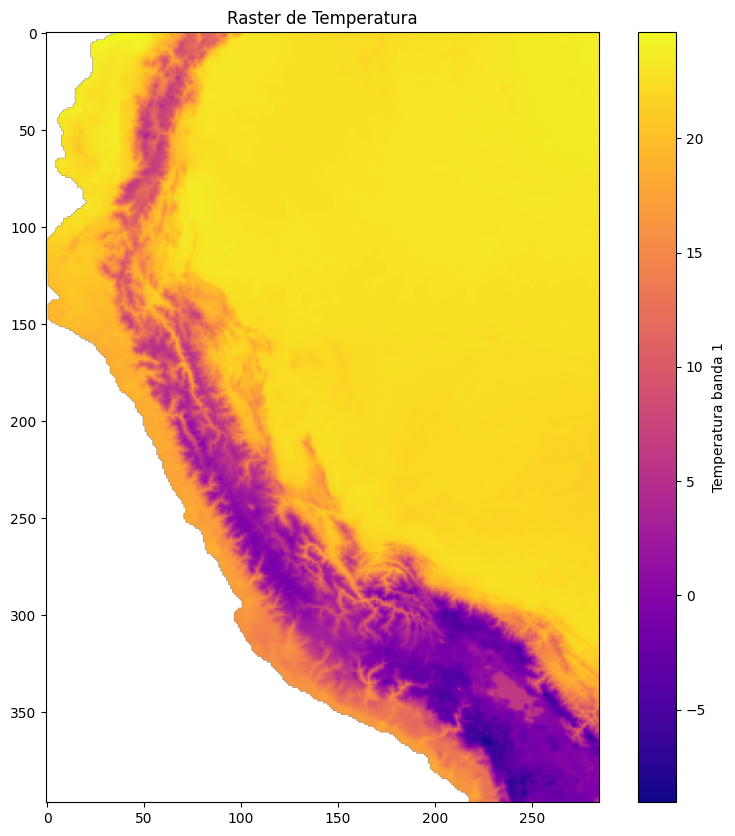

In [36]:
# Visualizamos la banda 1

plt.figure(figsize=(10, 10))
plt.imshow(banda1, cmap='plasma')
plt.colorbar(label='Temperatura banda 1')
plt.title("Raster de Temperatura")
plt.show()

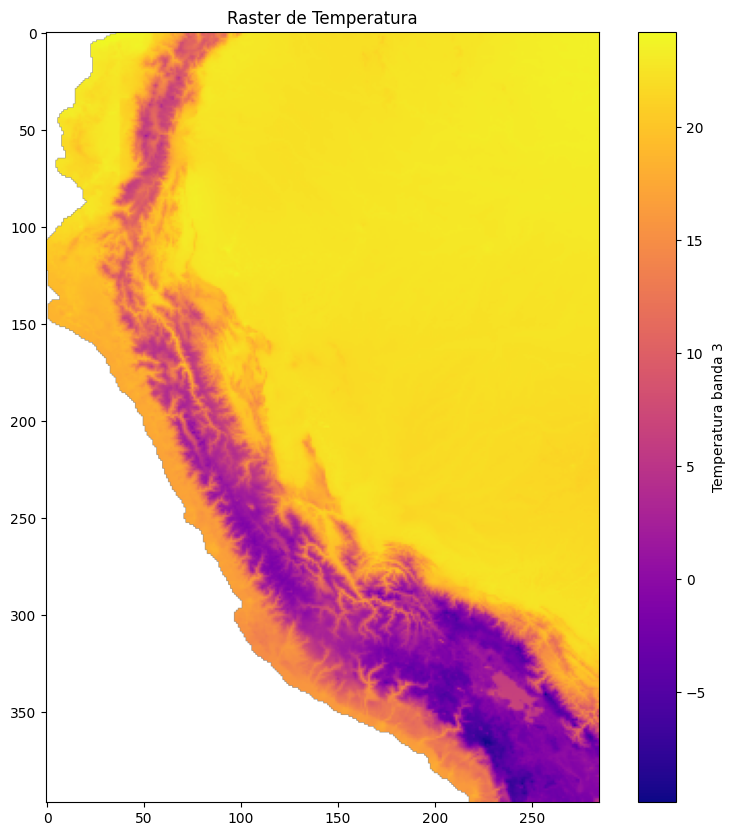

In [37]:
# Visualizamos la banda 3

plt.figure(figsize=(10, 10))
plt.imshow(banda3, cmap='plasma')
plt.colorbar(label='Temperatura banda 3')
plt.title("Raster de Temperatura")
plt.show()

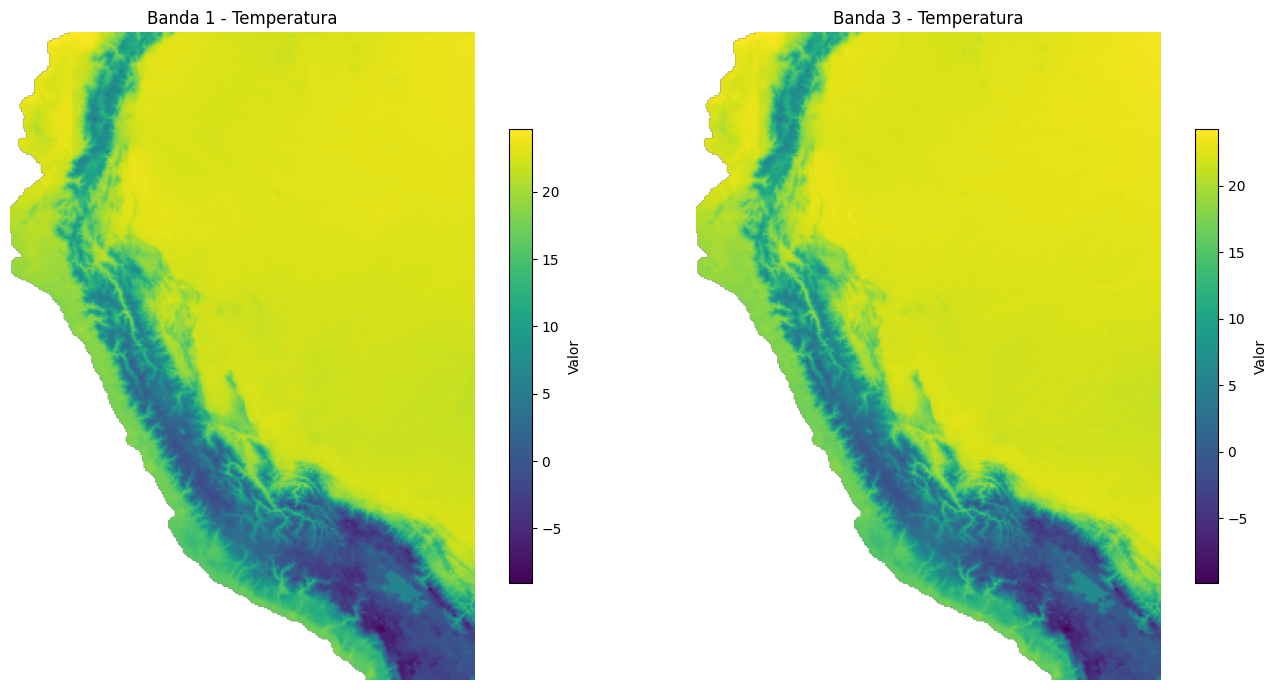

In [38]:
# Comparación visual de bandas 1 y 3

import rasterio
import matplotlib.pyplot as plt

# Ruta al archivo
archivo = "tmin_raster.tif"

# Abrir el archivo y leer banda 1 y banda 3
with rasterio.open(archivo) as src:
    banda1 = src.read(1)
    banda5 = src.read(5)

# Mostrar ambas bandas lado a lado
plt.figure(figsize=(14, 7))

# Banda 1
plt.subplot(1, 2, 1)
plt.imshow(banda1, cmap='viridis')
plt.title("Banda 1 - Temperatura")
plt.colorbar(shrink=0.7, label="Valor")
plt.axis('off')

# Banda 5
plt.subplot(1, 2, 2)
plt.imshow(banda3, cmap='viridis')
plt.title("Banda 3 - Temperatura")
plt.colorbar(shrink=0.7, label="Valor")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
## 1.3. Cropping

In [46]:
# Reproyectar shapefile
with rasterio.open(archivo) as src:       # Abrir el tfile de clasificación
    if gdf.crs != src.crs:                    # Si el sistema de coordenadas es distinto...
        gdf = gdf.to_crs(src.crs)             # ... que adopte el sistema de coordenadas del rasterfile              

    # Recortar el raster usando el shapefile
    out_image, out_transform = mask(src, gdf.geometry, crop=True)   # Recorte en base a geometry de gdf
    out_meta = src.meta.copy()                                      # Copia de la metadata original

# Actualizar metadata para el nuevo raster recortado
out_meta.update({                    # Actualizo la copia de la metadata original con los parámetros del raster recortado
    "height": out_image.shape[1],    # altura
    "width": out_image.shape[2],     # ancho
    "transform": out_transform
})

# Guardar el nuevo raster recortado
with rasterio.open("recorte.tif", "w", **out_meta) as dest:
    dest.write(out_image)

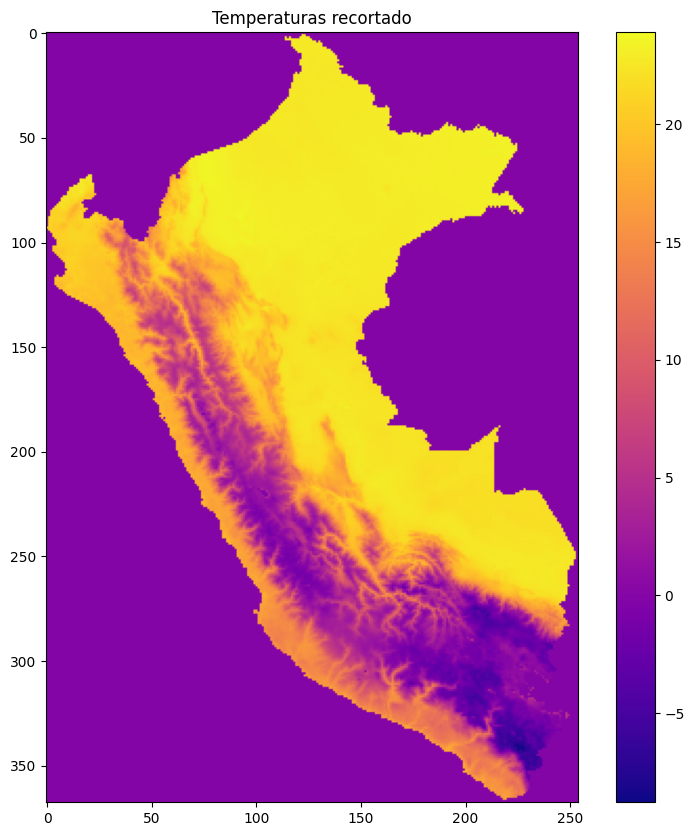

In [47]:
# Visualizamos el recorte

plt.figure(figsize=(10, 10))
plt.imshow(out_image[0], cmap='plasma')
plt.title("Temperaturas recortado")
plt.colorbar()
plt.show()

In [ ]:
# 2. Estadísticas zonales

In [ ]:
## 2.1. Chequear escala

In [48]:
# Chequear si se necesita re-escalar el raster

import rioxarray as rxr
import numpy as np
import pandas as pd

# Cargar raster
da = rxr.open_rasterio("tmin_raster.tif", masked=True)

# Ver estadísticos globales por banda (rápido chequeo)
for b in range(1, da.sizes["band"] + 1):
    vals = np.asarray(da.sel(band=b).values).ravel()
    vals = vals[np.isfinite(vals)]
    print(f"Banda {b}: min={vals.min():.2f}, max={vals.max():.2f}, mean={vals.mean():.2f}")

# Evaluar si necesita reescalamiento
# Criterio empírico para Tmin:
#     - Kelvin ≈ 250–320  →  restar 273.15
#     - Escalado ×10 ≈ 150–250  →  dividir entre 10
#     - Escalado ×100 ≈ 1500–2500  →  dividir entre 100
#     - Celsius normal ≈ -10–35  →  sin cambios

def detectar_escala(v):
    if v.mean() > 250 and v.mean() < 330:
        return "Kelvin"
    elif v.mean() > 150 and v.mean() < 250:
        return "x10"
    elif v.mean() > 1500 and v.mean() < 2500:
        return "x100"
    else:
        return "Celsius"

primer_banda = np.asarray(da.sel(band=1).values).ravel()
primer_banda = primer_banda[np.isfinite(primer_banda)]
escala = detectar_escala(primer_banda)

print(f"\nPosible escala detectada: {escala}")

Banda 1: min=-9.05, max=24.64, mean=18.01
Banda 2: min=-10.02, max=24.39, mean=17.91
Banda 3: min=-9.87, max=24.21, mean=17.77
Banda 4: min=-9.06, max=24.12, mean=17.61
Banda 5: min=-8.85, max=24.15, mean=17.82

Posible escala detectada: Celsius


In [ ]:
## 2.2. Estadísticas zonales (nivel distrital)

In [52]:
# Los datos están en celsius, por lo cual no se requiere re-escalamiento

# Estadísticas zonales por distrito (todas las bandas/años)

from pathlib import Path
import numpy as np
import pandas as pd
import rasterio
from rasterstats import zonal_stats

raster_fp = Path("tmin_raster.tif")
assert raster_fp.exists(), f"No encuentro el raster en: {raster_fp.resolve()}"

# ----------------  mecanismos que evitan el error "output array is read-only") ----------------
def _to_writable_finite(a):
    v = a.compressed() if isinstance(a, np.ma.MaskedArray) else np.asarray(a).ravel()
    v = v.astype("float64", copy=True)
    return v[np.isfinite(v)]

def _p10(a): 
    v = _to_writable_finite(a);  return float(np.percentile(v, 10)) if v.size else np.nan
def _p90(a): 
    v = _to_writable_finite(a);  return float(np.percentile(v, 90)) if v.size else np.nan
def _amp(a): 
    v = _to_writable_finite(a);  return float(np.percentile(v, 90) - np.percentile(v, 10)) if v.size else np.nan

# ---------------- metadatos raster y mapeo banda→año ----------------
with rasterio.open(raster_fp) as src:
    n_bands = src.count
    nodata  = src.nodata
    band_to_year = {b: 2020 + (b-1) for b in range(1, n_bands+1)}
print("Mapeo banda→año:", band_to_year)

# ---------------- estadísticas zonas por banda ----------------
def zonal_por_banda(band):
    stats = zonal_stats(
        gdf,
        str(raster_fp),
        band=band,
        stats=["count","mean","min","max","std"],
        add_stats={"percentile_10": _p10, "percentile_90": _p90, "amplitud_p90_p10": _amp},
        nodata=nodata,
        geojson_out=False,
        raster_out=False
    )
    out = pd.DataFrame(stats)
    out["year"] = band_to_year[band]
    return out

dfs = [zonal_por_banda(b) for b in range(1, n_bands+1)]
df_zonal = pd.concat(dfs, ignore_index=True)          # n_distritos * n_bandas filas

# ---------------- ALINEAR nombres para cada banda (sin esto, varios valores categóricas son Nan) ----------------
# (tomamos solo columnas de nombres que existan en tu gdf; excluimos geometría)
cols_nombres = [c for c in ["DEPARTAMEN","PROVINCIA","DISTRITO","NOMBRE"] if c in gdf.columns]
gdf_names = gdf[cols_nombres].reset_index(drop=True)

# repetimos los nombres tantas veces como bandas, preservando el orden
names_repeated = pd.concat([gdf_names] * n_bands, ignore_index=True)

# aseguramos índices limpios y concatenamos lado a lado
df_zonal = df_zonal.reset_index(drop=True)
df_zonal = pd.concat([names_repeated, df_zonal], axis=1)

# ---------------- chequeo rápido ----------------
print("df_zonal shape:", df_zonal.shape)  # debe ser (n_distritos * n_bandas, cols)
display(df_zonal.groupby("year").head(3))


Mapeo banda→año: {1: 2020, 2: 2021, 3: 2022, 4: 2023, 5: 2024}
df_zonal shape: (9365, 12)


,DEPARTAMEN,PROVINCIA,DISTRITO,min,max,mean,count,std,percentile_10,percentile_90,amplitud_p90_p10,year
0,HUANUCO,PUERTO INCA,CODO DEL POZUZO,8.903979,22.604116,18.932154,107,3.430219,13.836891,22.358987,8.522096,2020
1,HUANUCO,PUERTO INCA,TOURNAVISTA,19.775057,22.860834,22.290649,57,0.464426,21.992695,22.676195,0.683500,2020
2,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,21.953405,22.141968,22.056366,6,0.076649,21.955791,22.137794,0.182004,2020
1873,HUANUCO,PUERTO INCA,CODO DEL POZUZO,8.871051,22.474157,18.824931,107,3.408129,13.774301,22.238324,8.464023,2021
1874,HUANUCO,PUERTO INCA,TOURNAVISTA,19.560644,22.563538,22.089505,57,0.460531,21.779426,22.394078,0.614651,2021
1875,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,21.775251,22.055870,21.968923,6,0.101088,21.836788,22.052484,0.215695,2021
3746,HUANUCO,PUERTO INCA,CODO DEL POZUZO,8.909850,22.463205,18.862075,107,3.403091,13.838130,22.237603,8.399474,2022
3747,HUANUCO,PUERTO INCA,TOURNAVISTA,19.583529,22.599394,22.105936,57,0.453417,21.856951,22.452612,0.595661,2022
3748,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,21.866282,22.036682,21.955933,6,0.067272,21.866549,22.024589,0.158040,2022
5619,HUANUCO,PUERTO INCA,CODO DEL POZUZO,8.662911,22.007109,18.431692,107,3.346839,13.491568,21.769268,8.277701,2023


In [53]:
# Ver las cinco primeras filas para cada año (2020-2024)

assert "df_zonal" in globals(), "No encuentro df_zonal"
for yr in sorted(df_zonal["year"].unique()):
    print(f"\n=== Año {yr} ===")
    display(df_zonal[df_zonal["year"] == yr].head(5))


=== Año 2020 ===


,DEPARTAMEN,PROVINCIA,DISTRITO,min,max,mean,count,std,percentile_10,percentile_90,amplitud_p90_p10,year
0,HUANUCO,PUERTO INCA,CODO DEL POZUZO,8.903979,22.604116,18.932154,107,3.430219,13.836891,22.358987,8.522096,2020
1,HUANUCO,PUERTO INCA,TOURNAVISTA,19.775057,22.860834,22.290649,57,0.464426,21.992695,22.676195,0.683500,2020
2,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,21.953405,22.141968,22.056366,6,0.076649,21.955791,22.137794,0.182004,2020
3,UCAYALI,PADRE ABAD,IRAZOLA,21.661476,22.481043,22.263211,62,0.158932,22.042723,22.416751,0.374029,2020
4,UCAYALI,PADRE ABAD,NESHUYA,21.975763,22.385101,22.173068,22,0.118299,22.023389,22.361992,0.338603,2020



=== Año 2021 ===


,DEPARTAMEN,PROVINCIA,DISTRITO,min,max,mean,count,std,percentile_10,percentile_90,amplitud_p90_p10,year
1873,HUANUCO,PUERTO INCA,CODO DEL POZUZO,8.871051,22.474157,18.824931,107,3.408129,13.774301,22.238324,8.464023,2021
1874,HUANUCO,PUERTO INCA,TOURNAVISTA,19.560644,22.563538,22.089505,57,0.460531,21.779426,22.394078,0.614651,2021
1875,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,21.775251,22.055870,21.968923,6,0.101088,21.836788,22.052484,0.215695,2021
1876,UCAYALI,PADRE ABAD,IRAZOLA,21.579020,22.465662,22.230315,62,0.154406,22.035054,22.378894,0.343840,2021
1877,UCAYALI,PADRE ABAD,NESHUYA,21.790583,22.344238,22.051399,22,0.171185,21.840805,22.330279,0.489474,2021



=== Año 2022 ===


,DEPARTAMEN,PROVINCIA,DISTRITO,min,max,mean,count,std,percentile_10,percentile_90,amplitud_p90_p10,year
3746,HUANUCO,PUERTO INCA,CODO DEL POZUZO,8.909850,22.463205,18.862075,107,3.403091,13.838130,22.237603,8.399474,2022
3747,HUANUCO,PUERTO INCA,TOURNAVISTA,19.583529,22.599394,22.105936,57,0.453417,21.856951,22.452612,0.595661,2022
3748,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,21.866282,22.036682,21.955933,6,0.067272,21.866549,22.024589,0.158040,2022
3749,UCAYALI,PADRE ABAD,IRAZOLA,21.583391,22.340981,22.169977,62,0.141920,21.974449,22.317607,0.343158,2022
3750,UCAYALI,PADRE ABAD,NESHUYA,21.856852,22.247469,22.033919,22,0.107894,21.885534,22.176196,0.290662,2022



=== Año 2023 ===


,DEPARTAMEN,PROVINCIA,DISTRITO,min,max,mean,count,std,percentile_10,percentile_90,amplitud_p90_p10,year
5619,HUANUCO,PUERTO INCA,CODO DEL POZUZO,8.662911,22.007109,18.431692,107,3.346839,13.491568,21.769268,8.277701,2023
5620,HUANUCO,PUERTO INCA,TOURNAVISTA,19.186457,22.163397,21.655648,57,0.447700,21.385053,22.001125,0.616072,2023
5621,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,21.375015,21.561808,21.492676,6,0.070417,21.398177,21.560745,0.162568,2023
5622,UCAYALI,PADRE ABAD,IRAZOLA,21.168961,21.997131,21.752044,62,0.149527,21.558409,21.916812,0.358403,2023
5623,UCAYALI,PADRE ABAD,NESHUYA,21.364294,21.787848,21.552995,22,0.122078,21.392667,21.728913,0.336246,2023



=== Año 2024 ===


,DEPARTAMEN,PROVINCIA,DISTRITO,min,max,mean,count,std,percentile_10,percentile_90,amplitud_p90_p10,year
7492,HUANUCO,PUERTO INCA,CODO DEL POZUZO,9.002318,22.482599,18.754149,107,3.358801,13.774815,22.178958,8.404143,2024
7493,HUANUCO,PUERTO INCA,TOURNAVISTA,19.724146,22.625916,22.099378,57,0.434192,21.788777,22.438683,0.649906,2024
7494,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,21.680176,21.938402,21.840640,6,0.088975,21.723733,21.922051,0.198318,2024
7495,UCAYALI,PADRE ABAD,IRAZOLA,21.441895,22.329485,22.071029,62,0.162780,21.864029,22.247253,0.383223,2024
7496,UCAYALI,PADRE ABAD,NESHUYA,21.649612,22.137220,21.878135,22,0.147724,21.713455,22.105886,0.392431,2024


In [54]:
# La tarea pide un indicador de libre elaboración del grupo. Este es el indicador: amplitud_p90_p10. Este mide la variabilidad interna de la temperatura mínima en cada distrito.
# Si la amplitud es pequeña, es un distrito on temperatura relativamente homogénea. Si es de amplitud grande, hay heterogeneidad de temperatura intra-distrital.


df_zonal["amplitud_p90_p10"].describe() # Muestra valores generales del indicador: amplitud_p90_p10


count    8945.000000
mean        3.216294
std         2.973319
min         0.000000
25%         0.832327
50%         2.465912
75%         4.645694
max        20.326131
Name: amplitud_p90_p10, dtype: float64

In [55]:
## Una mirada a la tabla anterior nos muestra que en el distrito de Codo del Pozuzo hay más variabilidad que en los distritos de Tournavista, Irazola, Alexander von Humboldt y Neshuya.

In [ ]:
## 2.3. Gráficos

In [ ]:
### Histograma/KDE del promedio de la temperatura mínima a nivel distrital.

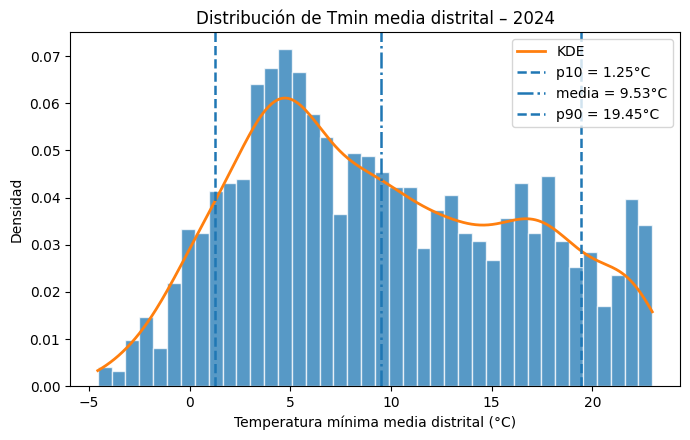

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Año a graficar
year_sel = 2024
df_y = df_zonal[df_zonal["year"] == year_sel].copy()
vals = df_y["mean"].dropna().values

# Estadísticos para anotar
p10 = np.percentile(vals, 10)
mu  = np.mean(vals)
p90 = np.percentile(vals, 90)

plt.figure(figsize=(7,4.5))

# 1) HISTOGRAMA en modo "densidad" para compararlo 1:1 con la KDE
#    (área total ≈ 1 en ambos)
n, bins, patches = plt.hist(vals, bins=40, density=True, alpha=0.75, edgecolor="white")

# 2) KDE (curva de densidad suavizada)
try:
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(vals)                     # bandwidth por defecto (Scott)
    xs = np.linspace(vals.min(), vals.max(), 400)
    plt.plot(xs, kde(xs), linewidth=2, label="KDE")
except Exception:
    pass

# 3) Líneas verticales: p10, media, p90
plt.axvline(p10, linestyle="--", linewidth=1.8, label=f"p10 = {p10:.2f}°C")
plt.axvline(mu,  linestyle="-.", linewidth=1.8, label=f"media = {mu:.2f}°C")
plt.axvline(p90, linestyle="--", linewidth=1.8, label=f"p90 = {p90:.2f}°C")

plt.xlabel("Temperatura mínima media distrital (°C)")
plt.ylabel("Densidad")
plt.title(f"Distribución de Tmin media distrital – {year_sel}")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
## La mayoría de distritos del país son de temperatura media-baja: alrededor de los 9.53 °C
## Hay distritos cuya temperatura mínima promedio están por encima de los 20° C. Probablemente sean de la selva.
## los distritos más frío del país tienen temperatura mínima promedio menor a 1.25° C.Probablemente son distritos del altiplano.


In [ ]:
### Ranking: Top-15 más fríos (riesgo heladas) y Top-15 más cálidos. Además: CSV descargables

In [58]:
import pandas as pd
from pathlib import Path

# columnas territoriales disponibles
cols_id = [c for c in ["DEPARTAMEN","PROVINCIA","DISTRITO","NOMBRE"] if c in df_zonal.columns]

# ordenar por 'mean'
cold15 = (df_y.sort_values("mean").loc[:, cols_id + ["mean","min","percentile_10","percentile_90","max","std"]].head(15))
warm15 = (df_y.sort_values("mean", ascending=False).loc[:, cols_id + ["mean","min","percentile_10","percentile_90","max","std"]].head(15))

display(cold15)
display(warm15)

# Guardar CSV para la app / entrega
out_dir = Path("data/outputs"); out_dir.mkdir(parents=True, exist_ok=True)
cold_csv = out_dir / f"ranking_top15_frio_{year_sel}.csv"
warm_csv = out_dir / f"ranking_top15_calor_{year_sel}.csv"
cold15.to_csv(cold_csv, index=False, encoding="utf-8")
warm15.to_csv(warm_csv, index=False, encoding="utf-8")
print("Guardados:", cold_csv, "y", warm_csv)


,DEPARTAMEN,PROVINCIA,DISTRITO,mean,min,percentile_10,percentile_90,max,std
7541,TACNA,TARATA,TARATA,-4.561076,-6.468026,-6.175215,-3.388719,5.581133,2.829068
7552,PUNO,EL COLLAO,CAPAZO,-4.560061,-6.613354,-5.652370,-3.202446,-2.628129,0.977825
7571,PUNO,EL COLLAO,SANTA ROSA,-4.197036,-7.580888,-6.378613,-2.484949,-1.978441,1.417075
7548,TACNA,TARATA,SUSAPAYA,-4.182688,-7.479485,-7.122831,-0.255336,3.157607,3.119703
7655,AREQUIPA,CAYLLOMA,SAN ANTONIO DE CHUCA,-4.096959,-5.785328,-5.024673,-3.261164,-2.268047,0.714200
8293,CUSCO,ESPINAR,CONDOROMA,-3.855525,-4.881903,-4.474339,-3.004616,-1.324180,0.790883
7543,TACNA,TARATA,TICACO,-3.745632,-5.706429,-5.661110,0.881710,2.511680,2.641085
8017,PUNO,LAMPA,PARATIA,-3.724841,-4.469860,-4.328072,-3.002615,-2.442494,0.529954
7553,TACNA,CANDARAVE,CANDARAVE,-3.715401,-7.204840,-6.199082,1.854045,7.017014,3.551047
7575,MOQUEGUA,MARISCAL NIETO,CARUMAS,-3.053063,-6.169868,-5.585243,3.935331,11.807583,4.463386


,DEPARTAMEN,PROVINCIA,DISTRITO,mean,min,percentile_10,percentile_90,max,std
9327,LORETO,PUTUMAYO,YAGUAS,22.973618,22.780083,22.854121,23.103278,23.226206,0.091803
9172,LORETO,DATEM DEL MARANON,MORONA,22.952683,20.953283,22.668024,23.238250,23.388550,0.334675
9168,LORETO,MARISCAL RAMON CASTILLA,RAMON CASTILLA,22.926581,22.814796,22.859756,22.986374,23.050581,0.048974
9167,LORETO,MARISCAL RAMON CASTILLA,SAN PABLO,22.887480,22.713934,22.803846,22.963652,23.012863,0.063301
9169,LORETO,DATEM DEL MARANON,PASTAZA,22.870794,22.581930,22.721573,23.020864,23.635798,0.145837
9171,LORETO,MARISCAL RAMON CASTILLA,PEBAS,22.836467,22.665327,22.760663,22.909175,22.993376,0.059887
9170,LORETO,MAYNAS,LAS AMAZONAS,22.762101,22.564980,22.656764,22.856007,22.948288,0.075826
8172,LORETO,PUTUMAYO,PUTUMAYO,22.742786,22.473694,22.568569,22.931459,23.055101,0.133731
8052,LORETO,MAYNAS,IQUITOS,22.722595,22.564741,22.594120,22.793990,22.847094,0.079448
9157,TUMBES,ZARUMILLA,AGUAS VERDES,22.709639,22.709639,22.709639,22.709639,22.709639,0.000000


Guardados: data\outputs\ranking_top15_frio_2024.csv y data\outputs\ranking_top15_calor_2024.csv


In [ ]:
### Seis de los distritos más fríos están en Puno
### Cuatro están en Tacna y cuatro en Arequipa, departamento de la zona sur del país.
### Loreto parece ser, por lejos, el departamento más caluroso.

In [ ]:
### Mapa coroplético estático (GeoPandas) de mean Tmin + PNG para la app y tabla descargable

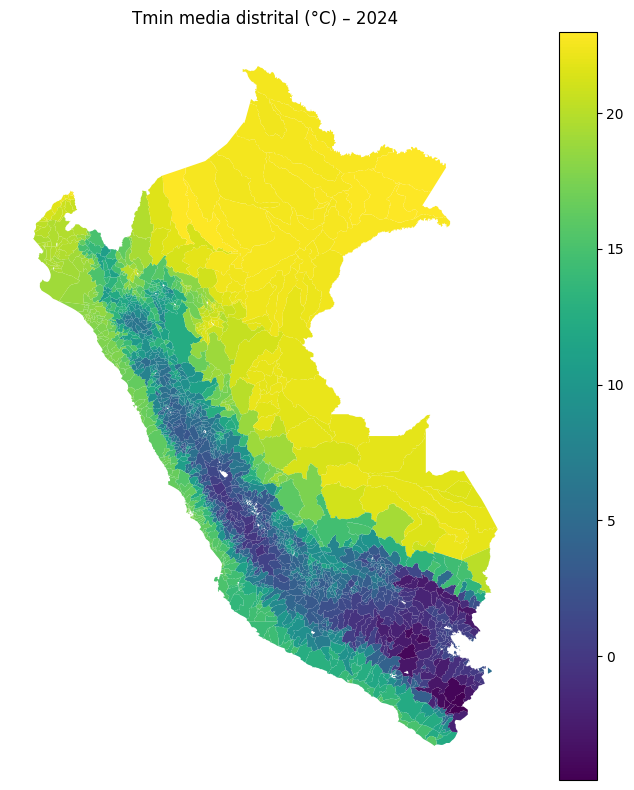

✅ Mapa guardado en: app\static_map.png
✅ Tabla descargable guardada en: data\outputs\tabla_mapa_tmin_2024.csv
Umbrales 2024 — p10=1.25°C, p90=19.45°C


,DEPARTAMEN,PROVINCIA,DISTRITO,mean,min,max,std,amplitud_p90_p10,CLASE_P10_P90
7492,HUANUCO,PUERTO INCA,CODO DEL POZUZO,18.754149,9.002318,22.482599,3.358801,8.404143,INTERMEDIO (p10–p90)
7493,HUANUCO,PUERTO INCA,TOURNAVISTA,22.099378,19.724146,22.625916,0.434192,0.649906,CÁLIDO (≥ p90)
7494,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,21.840640,21.680176,21.938402,0.088975,0.198318,CÁLIDO (≥ p90)
7495,UCAYALI,PADRE ABAD,IRAZOLA,22.071029,21.441895,22.329485,0.162780,0.383223,CÁLIDO (≥ p90)
7496,UCAYALI,PADRE ABAD,NESHUYA,21.878135,21.649612,22.137220,0.147724,0.392431,CÁLIDO (≥ p90)


In [61]:
# Choropleth + tabla descargable para la app
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# --- 1) Filtrar año y preparar columnas ---
df_y = df_zonal[df_zonal["year"] == year_sel].copy()
cols_id = [c for c in ["DEPARTAMEN","PROVINCIA","DISTRITO","NOMBRE"] if c in df_zonal.columns]
req_cols = cols_id + [c for c in ["mean","min","max","std","p10","p90","amplitud_p90_p10"] if c in df_zonal.columns]
df_map = df_y[req_cols].copy()

# --- 2) (Opcional) Clasificación por percentiles globales del año ---
p10_glob = np.percentile(df_map["mean"].dropna(), 10)
p90_glob = np.percentile(df_map["mean"].dropna(), 90)
def _clas(v):
    if pd.isna(v): return np.nan
    if v <= p10_glob: return "FRÍO (≤ p10)"
    if v >= p90_glob: return "CÁLIDO (≥ p90)"
    return "INTERMEDIO (p10–p90)"
df_map["CLASE_P10_P90"] = df_map["mean"].map(_clas)

# --- 3) Unir al GeoDataFrame (join por nombres normalizados) ---
gmap = gdf.merge(df_map, on=cols_id, how="left")

# --- 4) Plot y PNG para la app ---
fig, ax = plt.subplots(figsize=(8,8))
gmap.plot(column="mean", ax=ax, legend=True, edgecolor="none")
ax.set_title(f"Tmin media distrital (°C) – {year_sel}")
ax.axis("off")
plt.tight_layout()

out_png = Path("app/static_map.png")
out_png.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(out_png, dpi=150, bbox_inches="tight")
plt.show()

# --- 5) Tabla descargable (CSV) para la app/entrega ---
out_dir = Path("data/outputs"); out_dir.mkdir(parents=True, exist_ok=True)
out_csv = out_dir / f"tabla_mapa_tmin_{year_sel}.csv"

# Sugerencia de columnas para la tabla pública:
cols_csv = cols_id + ["mean","min","max","std"]
if "p10" in df_map and "p90" in df_map:
    cols_csv += ["p10","p90"]
if "amplitud_p90_p10" in df_map:
    cols_csv += ["amplitud_p90_p10"]
cols_csv += ["CLASE_P10_P90"]

tabla_mapa = df_map[cols_csv].copy()
tabla_mapa.to_csv(out_csv, index=False, encoding="utf-8")

print("✅ Mapa guardado en:", out_png)
print("✅ Tabla descargable guardada en:", out_csv)
print(f"Umbrales {year_sel} — p10={p10_glob:.2f}°C, p90={p90_glob:.2f}°C")
display(tabla_mapa.head())
